In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

In [0]:
path ='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
online_rt = pd.read_csv(path, encoding = 'latin1')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


/home/spark-ab6c474e-6e87-4da6-af84-13/.ipykernel/2746/command-8515716810026869-3881430600:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countries = online_rt.groupby('Country').sum()


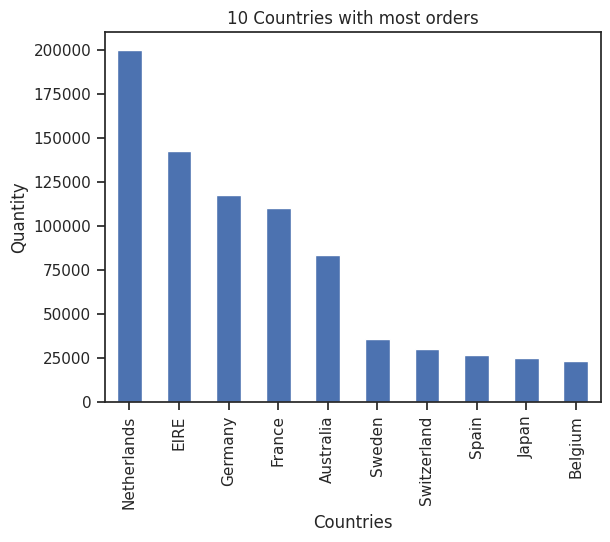

In [0]:
countries = online_rt.groupby('Country').sum()
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]
countries['Quantity'].plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')
plt.show()

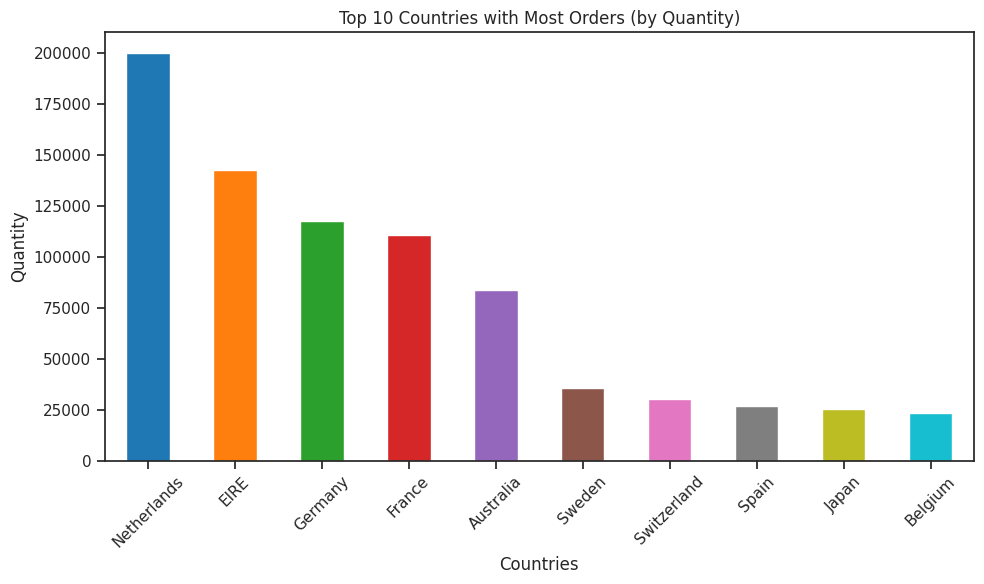

In [0]:
countries = online_rt.groupby("Country").sum(numeric_only=True)
top_countries = countries.sort_values(by="Quantity", ascending=False)[1:11]
colors = plt.cm.tab10.colors  # 10 distinct colors from matplotlib's colormap

# Plotting
top_countries["Quantity"].plot(kind="bar", figsize=(10, 6) , color=colors)
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.title("Top 10 Countries with Most Orders (by Quantity)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


/home/spark-ab6c474e-6e87-4da6-af84-13/.ipykernel/2746/command-8515716810026881-3890628274:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers = online_rt.groupby(['CustomerID', 'Country']).sum()
/databricks/python/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


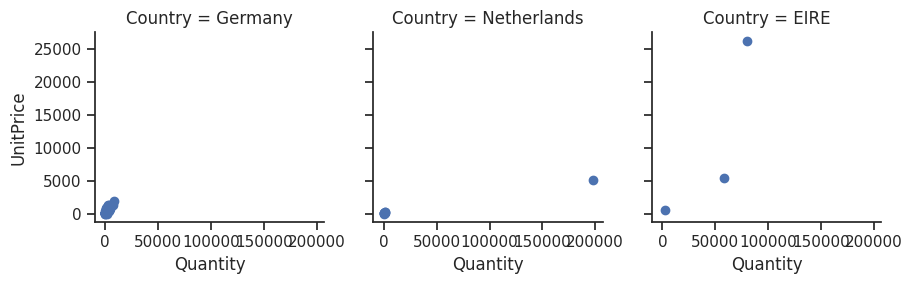

In [0]:
# groupby CustomerID
customers = online_rt.groupby(['CustomerID', 'Country']).sum()
# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]
# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)
# top three countries
top_countries = ['Netherlands', 'EIRE', 'Germany']
# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]
#################
# Graph Section #
#################
# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")
# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
# adds legend
g.add_legend()

In [0]:
 customers = online_rt.groupby(['CustomerID','Country']).sum().head()
 #Here's what it looks like:
 customers

/home/spark-ab6c474e-6e87-4da6-af84-13/.ipykernel/2746/command-8515716810026887-3428098275:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers = online_rt.groupby(['CustomerID','Country']).sum().head()


,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


In [0]:
customers.UnitPrice.dtype

display(
    online_rt[online_rt.CustomerID == 12347.0]
    .sort_values(by='UnitPrice', ascending=False)
    .head()
)

display(
    online_rt[online_rt.CustomerID == 12346.0]
    .sort_values(by='UnitPrice', ascending=False)
    .head()
)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [0]:
sales_volume = online_rt.groupby('Country')[
    'Quantity'
].sum().sort_values(ascending=False)
top3 = sales_volume.index[1:4]  # We are excluding UK
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

In [0]:
 online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
 online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [0]:
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity
# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

/home/spark-ab6c474e-6e87-4da6-af84-13/.ipykernel/2746/command-8515716810026904-3761250149:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


/databricks/python/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


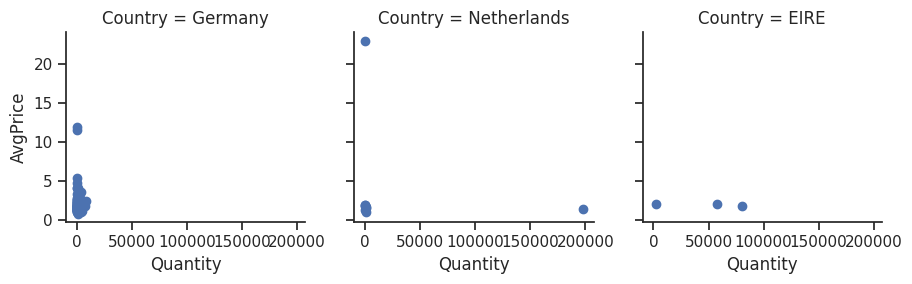

In [0]:
 g = sns.FacetGrid(plottable, col="Country")
 # map over a make a scatterplot
 g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)
 # adds legend
 g.add_legend();

/home/spark-ab6c474e-6e87-4da6-af84-13/.ipykernel/2746/command-8515716810026912-841816452:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = online_rt.groupby([


CustomerID
12346.0    74215
12347.0     2458
12348.0     2341
12349.0      631
12350.0      197
           ...  
18280.0       45
18281.0       54
18282.0      103
18283.0     1397
18287.0     1586
Name: Quantity, Length: 4339, dtype: int64

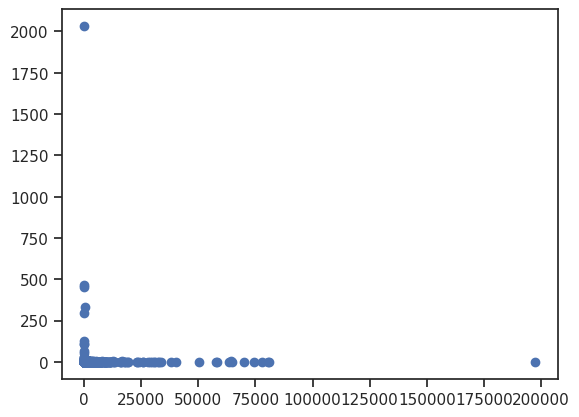

In [0]:
grouped = online_rt.groupby([
    'CustomerID'
])[
    'Quantity',
    'Revenue'
].agg(
    'sum'
)

plottable = grouped
plottable['AvgPrice'] = plottable['Revenue'] / plottable['Quantity']

# map over a make a scatterplot
plt.scatter(plottable['Quantity'], plottable['AvgPrice'])
plt.plot()
plottable['Quantity']

# Turns out the graph is still extremely skewed towards the axes like an exponential decay function.

[]

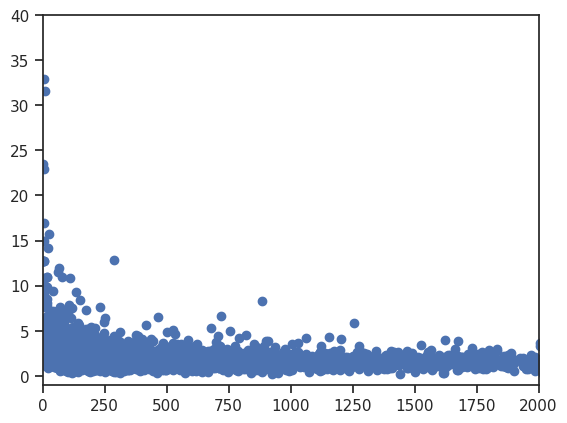

In [0]:
grouped = online_rt.groupby('CustomerID').agg({'Quantity': 'sum', 'Revenue': 'sum'})
plottable = grouped.assign(AvgPrice = grouped['Revenue'] / grouped['Quantity'])

plt.scatter(plottable['Quantity'], plottable['AvgPrice'])
plt.xlim(0, 2000)
plt.ylim(-1, 40)
plt.plot()

In [0]:
import numpy as np
import pandas as pd

price_start = 0
price_end = 50
price_interval = 1

# Creating the buckets to collect the data accordingly
buckets = np.arange(price_start, price_end, price_interval)

# Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1107774.544
(1, 2]    2691765.110
(2, 3]    2024143.090
(3, 4]     865101.780
(4, 5]    1219377.050
Name: Revenue, dtype: float64

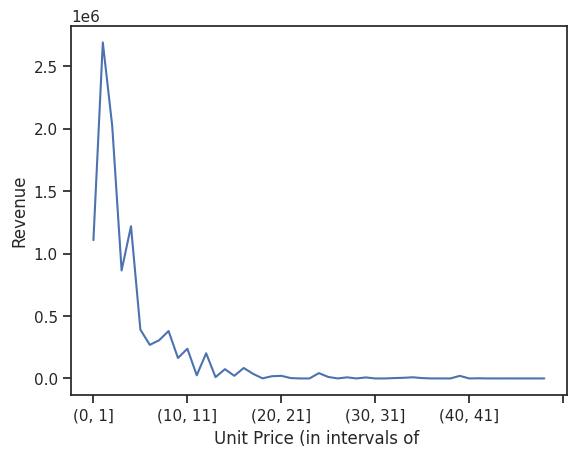

In [0]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of ')
plt.ylabel('Revenue')
plt.show()

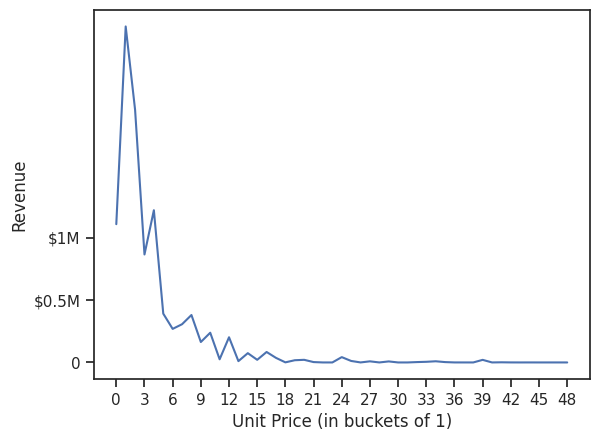

In [0]:
revenue_per_price.plot()

# Place labels
plt.xlabel('Unit Price (in buckets of ' + str(price_interval) + ')')
plt.ylabel('Revenue')

# Adjust the number of labels to match the number of ticks
plt.xticks(np.arange(price_start, price_end, 3),
           np.arange(price_start, price_end, 3))
plt.yticks([0, 500000, 1000000], ['0', '$0.5M', '$1M'])  # Adjusted to include '$1M'

plt.show()